# 15 Principal Component Analysis
__Math 3280 - Data Mining__ : Snow College : Dr. Michael E. Olson

* Brunton, Chapter 1, Section 1.5
* Geron, Chapter 8

Helpful videos:
* Serrano Academy: https://www.youtube.com/watch?v=g-Hb26agBFg
* Steve Brunton: https://www.youtube.com/watch?v=fkf4IBRSeEc&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv

Desmos Graphics:
* https://www.desmos.com/calculator/ywbgtwwvsi
-----

In [1]:
import numpy as np
import matplotlib.pyplot as plt

PCA is based on the SVD, and is the bedrock dimensionality reduction technique, commonly used in statistics, probability, and other data science field.
* Useful to uncover lower dimension variables from big data for analysis and to establish models

Around since 1901. Can be considered as the Statistical Interpretation of SVD
* Data-driven hierarchical coordinate system based on data to represent statistical variation in data

$$X = \begin{bmatrix}
\dots & x_1 & \dots \\
\dots & x_2 & \dots \\
 & \vdots &
\end{bmatrix}$$

Each row represents the measurements from a single experiment (consistent with statistics).

>Procedure:
>1. Compute mean row
>$$\bar{x}=\frac{1}{n}\sum_{j=1}^n x_j$$
>$$\bar{X}=\begin{bmatrix}1\\1\\\vdots\\1\end{bmatrix}\begin{bmatrix}\qquad\bar{x}\qquad\end{bmatrix}$$
>  * Consider $\bar{X}$ to be a matrix of nothing but the average value for each column
>2. Subtract the mean
>$$B=X-\bar{X}$$
>3. Covariance matrix (correlation matrix from SVD) of rows of B:
>$$C=\frac{1}{n-1}B^TB$$

The covariance matrix will look like this:
$$C = \begin{bmatrix}
  var(x_1)     & covar(x_1,x_2) & covar(x_1,x_3) & \dots \\
covar(x_2,x_1) &   var(x_2)     & covar(x_2,x_3) & \dots \\
covar(x_3,x_1) & covar(x_3,x_2) &   var(x_3)     & \dots \\
\vdots         &   \vdots       &  \vdots        & \ddots  
\end{bmatrix}$$

>4. Compute eigenvalues and eigenvectors of covariance matrix $C$
>$$Cv=\lambda v \qquad\to\qquad v^TCv = \lambda v^Tv \qquad\to\qquad v^T B^T B v = \lambda$$
>Do this for all possible $v$ and find their eigenvalues. Then, we have a set of eigenvalues we'll put in a matrix $V$ and the corresponding eigenvalues, which we'll put in a matrix $D$
>$$CV=VD$$

Make a new matrix,
$T=BV$

* $T$ is a matrix of principal components
* $V$ are the loadings

This is using traditional PCA notation. But we can relate this back to SVDs:
$$B=U\Sigma V^T \qquad T=BV=U\Sigma V^T V = U\Sigma$$

We can thus use the SVD to get the principal components and loadings, which are results of the very important statistical calculations.

The eigenvalues of the matrix $D$ would be the square of the singular values $\lambda = \sigma^2$, which represents the variance of its corresponding principal component from the data.

The percentage of the variance captured in the first $r$ principal components would be,
$$\frac{\sum_{k=1}^r \lambda_k}{\sum_{k=1}^n \lambda_k}$$
We can use this select the first $r$ components to capture a given amount of variance (say, 95%).

In [13]:
# 1. Compute mean row
#X = np.array([[1,3],[5,7],[2,4],[6,8],[1,1],[2,3],[1,2],[4,8],[4,3],[2,1]])
X = (np.random.randn(20,2)*[15,2])

# Rotate this matrix by an angle of pi/6
theta = np.pi/6
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

X = X @ R
X

array([[ -4.79992518,   1.92090252],
       [ -9.03631602,   5.02496967],
       [ 27.54456765, -14.66865286],
       [ 16.43866076,  -9.86187136],
       [-12.44800035,   5.25390904],
       [ 12.22777689,  -9.44851092],
       [  7.8208818 ,  -5.2121404 ],
       [ 15.19787193, -10.83508568],
       [ -4.99521493,   3.47343675],
       [  4.47605782,  -0.81442156],
       [-32.80885569,  16.55131011],
       [ -1.49250475,   3.44048981],
       [ 15.39588002,  -9.97882796],
       [  8.09889475,  -6.24785835],
       [ -1.94144573,   0.07338103],
       [ -5.37426183,   1.63669025],
       [ -1.21509238,   4.27218745],
       [ -2.71985847,   0.74410234],
       [ 14.48709283,  -8.21531569],
       [ 18.43182496, -12.70883936]])

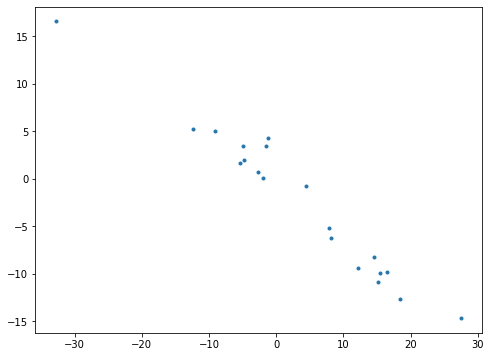

In [17]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.plot(X[:,0],X[:,1],'.')
#ax.spines['left'].set_position('center')

In [22]:
np.mean(X, axis=0)*np.ones(X.shape)

array([[ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726],
       [ 3.1644017 , -2.28000726]])

[[ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]
 [ 3.1644017  -2.28000726]]


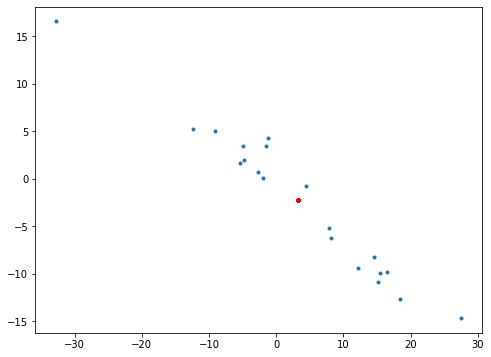

In [23]:
X_bar = np.mean(X,axis=0)*np.ones(X.shape)  # Calculate mean row
print(X_bar)#[0:3,:]

plt.plot(X[:,0],X[:,1],'.')
plt.plot(X_bar[:,0],X_bar[:,1],'.',color='red')

In [26]:
# 2. Subtract mean
B = X-X_bar
B

array([[ -7.96432688,   4.20090978],
       [-12.20071772,   7.30497693],
       [ 24.38016595, -12.3886456 ],
       [ 13.27425905,  -7.5818641 ],
       [-15.61240205,   7.5339163 ],
       [  9.06337518,  -7.16850366],
       [  4.65648009,  -2.93213314],
       [ 12.03347023,  -8.55507842],
       [ -8.15961663,   5.75344401],
       [  1.31165611,   1.4655857 ],
       [-35.97325739,  18.83131736],
       [ -4.65690646,   5.72049707],
       [ 12.23147831,  -7.6988207 ],
       [  4.93449305,  -3.96785109],
       [ -5.10584744,   2.35338829],
       [ -8.53866353,   3.9166975 ],
       [ -4.37949408,   6.55219471],
       [ -5.88426018,   3.0241096 ],
       [ 11.32269113,  -5.93530843],
       [ 15.26742326, -10.42883211]])

In [27]:
# 3. Compute covariance Matrix of rows of B
# Same as correlation matrix from SVD
C = B.T @ B
C

array([[ 3547.36612109, -2005.66721215],
       [-2005.66721215,  1186.45986271]])

In [28]:
# 4. Compute eigenvalues & eigenvectors of C
U,S,V = np.linalg.svd(B, full_matrices=False)
T = B @ V

T

array([[-8.99912475e+00,  3.06430031e-01],
       [-1.42175505e+01, -2.85408338e-01],
       [ 2.73140389e+01, -1.34696391e+00],
       [ 1.52869410e+01, -7.10052194e-03],
       [-1.72929045e+01,  1.20931602e+00],
       [ 1.14262528e+01,  1.72422745e+00],
       [ 5.49776569e+00,  2.34059821e-01],
       [ 1.46928783e+01,  1.45365015e+00],
       [-9.93929400e+00, -9.44402653e-01],
       [ 4.11183283e-01, -1.92335943e+00],
       [-4.05760782e+01,  1.50852123e+00],
       [-6.88220500e+00, -2.65445263e+00],
       [ 1.44397476e+01,  6.12039017e-01],
       [ 6.25321396e+00,  9.95177941e-01],
       [-5.60059218e+00,  4.91407845e-01],
       [-9.35663633e+00,  8.38242663e-01],
       [-7.05421320e+00, -3.51415710e+00],
       [-6.60926756e+00,  2.95531721e-01],
       [ 1.27754608e+01, -4.67784633e-01],
       [ 1.84303839e+01,  1.47502534e+00]])

In [29]:
U

array([[-0.13134708,  0.04866653],
       [-0.20751282, -0.04532791],
       [ 0.39866312, -0.21392177],
       [ 0.22312115, -0.00112769],
       [-0.25239927,  0.19206084],
       [ 0.16677232,  0.27383791],
       [ 0.08024285,  0.03717285],
       [ 0.21445048,  0.23086544],
       [-0.14506935, -0.1499879 ],
       [ 0.00600144, -0.30546361],
       [-0.59222974,  0.23957994],
       [-0.10044949, -0.42157418],
       [ 0.2107559 ,  0.09720266],
       [ 0.09126903,  0.15805192],
       [-0.08174366,  0.07804429],
       [-0.13656515,  0.13312781],
       [-0.10296004, -0.5581105 ],
       [-0.09646582,  0.04693568],
       [ 0.18646474, -0.0742925 ],
       [ 0.26900139,  0.2342602 ]])

In [45]:
S

array([1.98537517, 0.49714339])

#### A bigger example (Brunton's example from section 1.5)

[[4.36865096 1.79683836 1.51191924 ... 2.32262467 1.90596636 3.45876965]
 [5.4315391  0.70469688 1.61038466 ... 1.01638005 1.1516269  2.44724632]]


(-6.0, 8.0)

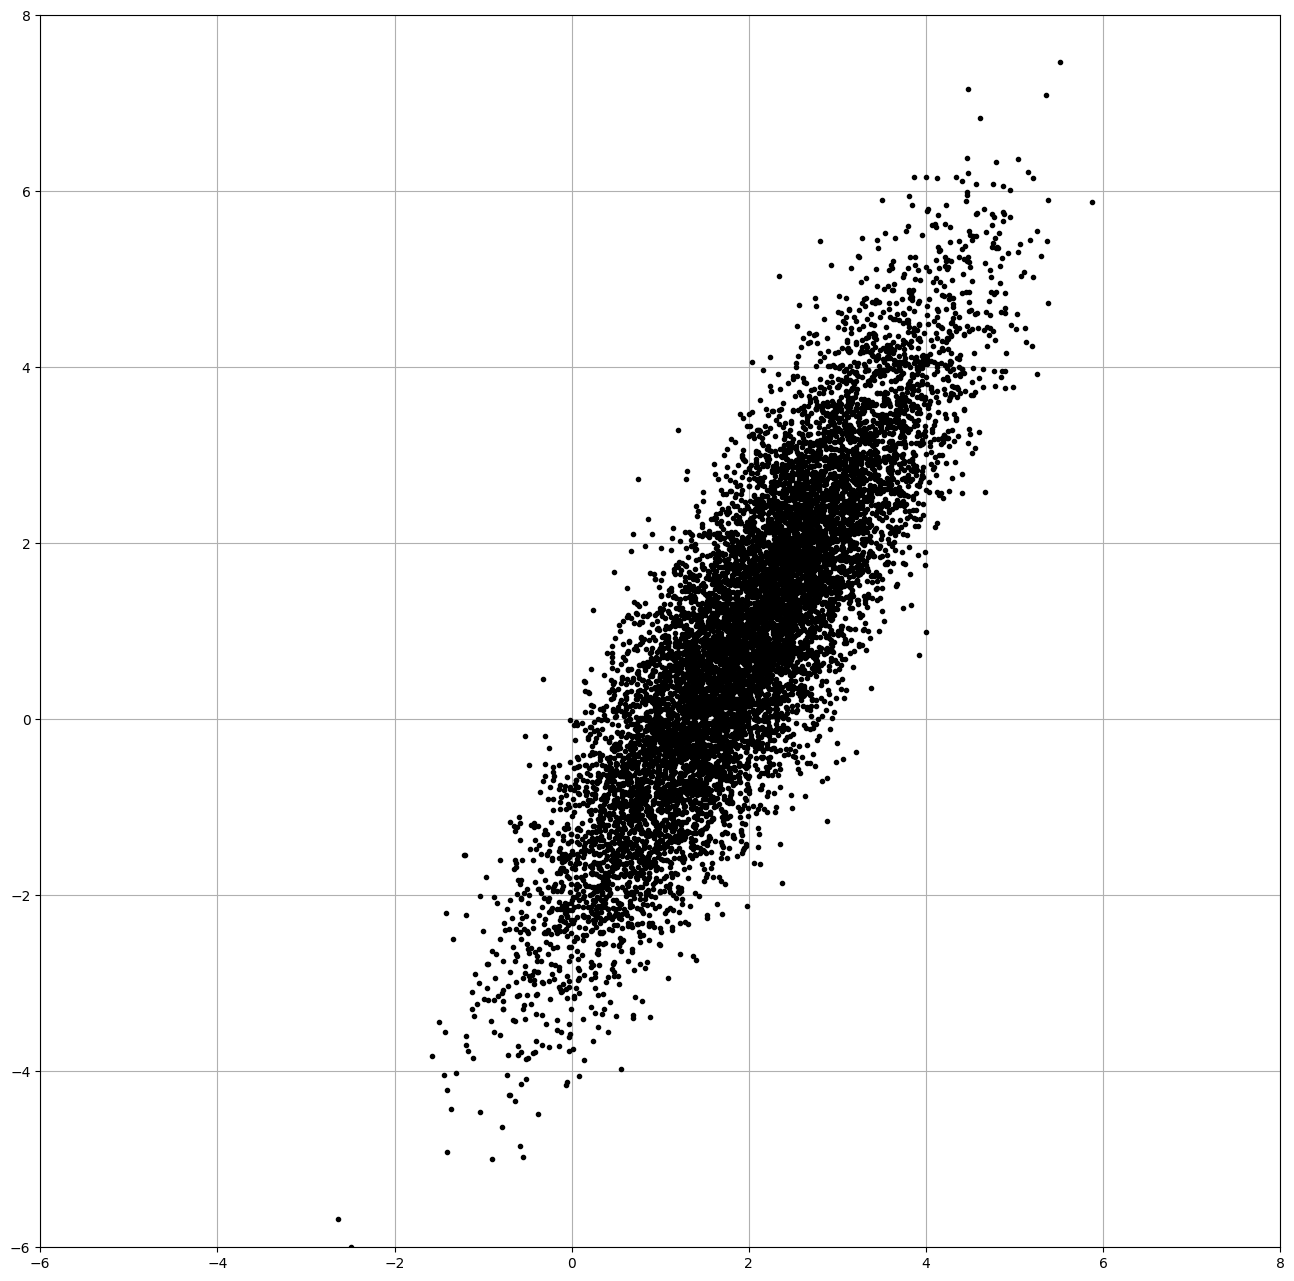

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

##### Create matrices and vectors to determine size, shape, and location of our random data
xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes
theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points

##### Create our random data at center xC, reshaped by sig, and rotated by R
#X = np.random.randn(2,nPoints)
#X = np.diag(sig) @ np.random.randn(2,nPoints)
#X = R @ np.diag(sig) @ np.random.randn(2,nPoints)
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))
print(X)
 
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

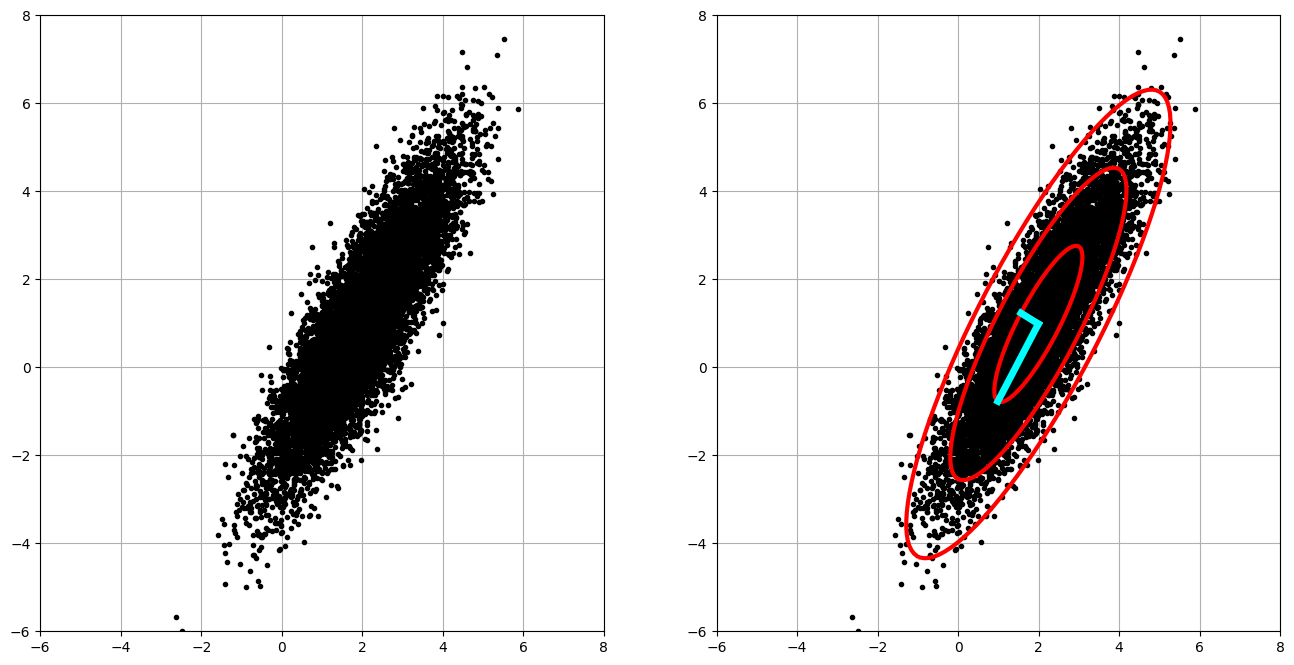

In [5]:
##### Plot the original Data
plt.rcParams['figure.figsize'] = [16, 8]
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

## f_ch01_ex03_1b

Xavg = np.mean(X,axis=1)                  # Compute mean
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

##### Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)
   # U tells the rotation of X
   # S tells the stretch of X

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

##### 1-std confidence interval
# Take a circle: np.array([np.cos(theta),np.sin(theta)])
theta = 2 * np.pi * np.arange(0,1,0.01)

# Change its shape: np.diag(S) @ A
# Rotate it: U @ A
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

##### Plot principal components U[:,0]S[0] and U[:,1]S[1]
##### T = U@S
#   * First principal component [(1st column of U) @ S]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
#   * Second principal component [(2nd column of U) @ S]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',linewidth=5)

plt.show()

In [6]:
# Compare original rotation to rotation found by SVD
print(R)
print()
print(U)

[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]

[[-0.49648816 -0.86804349]
 [-0.86804349  0.49648816]]


In [51]:
# Compare original singular value (principal components) to those found by SVD
print(sig)
print()
print(S)

[2.  0.5]

[1.98537517 0.49714339]


In [50]:
T = (B/np.sqrt(nPoints)) @ VT.T
T

array([[-0.99969952, -0.4295203 ],
       [-1.71531788,  0.2503275 ]])

In [40]:
T2 = U @ np.diag(S)
T2

array([[-0.99969952, -0.4295203 ],
       [-1.71531788,  0.2503275 ]])

## Eigenfaces

Set of images from a number of students from Yale:
* 36 students
* 64 different images
  * lights flash from different angles, giving a different perspective for each image

Dataset available at http://databookuw.com/page-17/

### Theory
In Linear Algebra, we find that any vector in an n-dimensional space as a linear combination of the $n$ basis vectors. We are going to do the same with pictures. Every face is a combination of the $n$ principal components, which serve as the basis vectors for reconstructing a face.

$$X = U\Sigma V^T$$

Every image is converted to a single column $x_i$ in the matrix $X$. Each column of $U$ will thus be the same size. We can multiply by $UU^T$ and not change an image's vector at all.
$$x=UU^Tx$$

Taking the first $r$ columns of $U$ will be the same as taking the first $r$ principal components of $X$. Unfortunately, we can't get a perfect reconstruction, but depending on how many principal components we take, we can get a good reconstruction.
$$x \approx U_rU_r^T x$$

So, we can compress an image by taking the first $r$ components, then multiplying $x$ by $U_r^T$. If we save that as a file, then we have a compressed file with enough information to store and later reconstruct an image.
$$\alpha = U_r^T x$$

Later, if someone has the same basis matrix $U$, then then can take the information you send and reconstruct the image.
$$x\approx U_r \alpha = U_rU_r^T x$$

__*Open Brunton's files CH01_SEC06_1.ipynb and CH01_SEC06_2_3_4.ipynb*__